Read data from `arff`

In [1]:
from scipy.io import arff
with open('../data/train_arff/1.music.arff', 'r') as f:
        data, meta = arff.loadarff(f)

Convert Data to matrix `X` and depedent variable `y` (Applied to only first file)

In [3]:
import pandas as pd 
import numpy as np
dataset = pd.DataFrame(data)
X = dataset.iloc[:,:-1].values
y = np.array([1 if str(w, 'utf-8') == 'music' else 0 for w in dataset.iloc[:, -1]])

Create a countplot (barplot) where y-axis is a count

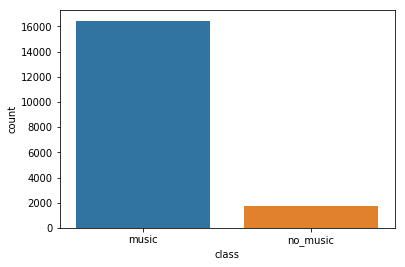

In [87]:
## With labels
%matplotlib inline
from matplotlib import pyplot as plt
from seaborn import countplot
dataset.iloc[:,-1] = np.array(["music" if i == 1 else "no_music" for i in y])
ax = countplot(x="class", data=dataset)

---------

As of here, I do the same for all files:
1. Collect file names in a list
2. load `dataset`, `X` and `y` using the `load_arfffile()` function
3. in a `for` loop creata a subplot for each `countplot`.

Collect the names of all music files in the directory

In [1]:
import os
## Collect names for all files
path = r"../data/train_arff/"
music_files = [path+file for file in os.listdir(path) if 'music' in file]
## Collect name of speech files
speech_files = [path+file for file in os.listdir(path) if 'speech' in file]

In [5]:
from scipy.io import arff
def load_arfffile(file_path):
    """Finds the feature matrix X and class vector y for given a file path
    Params:
    -------
        file_path: (string) the relative path to the .arff file
    
    Returns:
    -------
        dataset (DataFrame from pandas) with headers correspondign to each features. It also includes the the dependet variable y.
        X: (nd.numpymatrix) The features matrix X consisting of only values, no headers are included.
        y: (n.numpyarray) vector of length = l where l is the number of instances in the dataset.
    """
    try:
        with open(file_path, 'r') as f:
            data, meta = arff.loadarff(f)
            print(file_path, "has", len(data), "training examples")
        dataset = pd.DataFrame(data)
        X = dataset.iloc[:,:-1].values
        y = np.array([1 if str(w, 'utf-8') == 'music' else 0 for w in dataset.iloc[:, -1]])
        dataset.iloc[:,-1] = np.array(["music" if i == 1 else "no_music" for i in y])
        return dataset, X, y
    except EOFError:
        print("File is unreadable!")
        return None

The following two cells will be deleted. I just want to test using 3 subplots together.

Using matplotlib backend: MacOSX
../data/train_arff/11.music.arff has 17954 training examples
../data/train_arff/2.music.arff has 17216 training examples
../data/train_arff/2.music.arff has 17216 training examples
../data/train_arff/14.music.arff has 18323 training examples
../data/train_arff/14.music.arff has 18323 training examples
../data/train_arff/7.music.arff has 17960 training examples
../data/train_arff/7.music.arff has 17960 training examples
../data/train_arff/13.music.arff has 18322 training examples
../data/train_arff/13.music.arff has 18322 training examples
../data/train_arff/5.music.arff has 17968 training examples
../data/train_arff/5.music.arff has 17968 training examples
../data/train_arff/8.music.arff has 17961 training examples
../data/train_arff/8.music.arff has 17961 training examples
../data/train_arff/6.music.arff has 17960 training examples


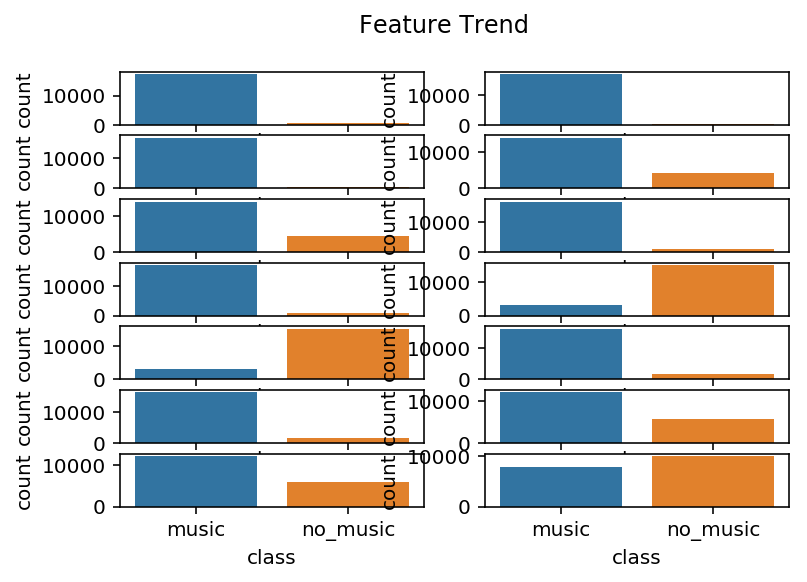

In [13]:
%matplotlib auto
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from seaborn import countplot

"""
Given X_train matrix and X_test matirx that follow a time series, it plots the first 9 features
sequentially.
"""
fig, ax = plt.subplots(7, 2, sharey=False, sharex=True) # two axes on figure

for i in range(int(len(music_files)/2)):
    for j in range(2):
        dataset, X, y = load_arfffile(music_files[i+j])
        countplot(x="class", data=dataset, ax=ax[i, j])
fig.suptitle("Feature Trend")
# fig.text(0.06, 0.5, 'Signal', ha='center', va='center', rotation='vertical')
fig.savefig('../Info/Class_Imbalance.png')
fig.show()